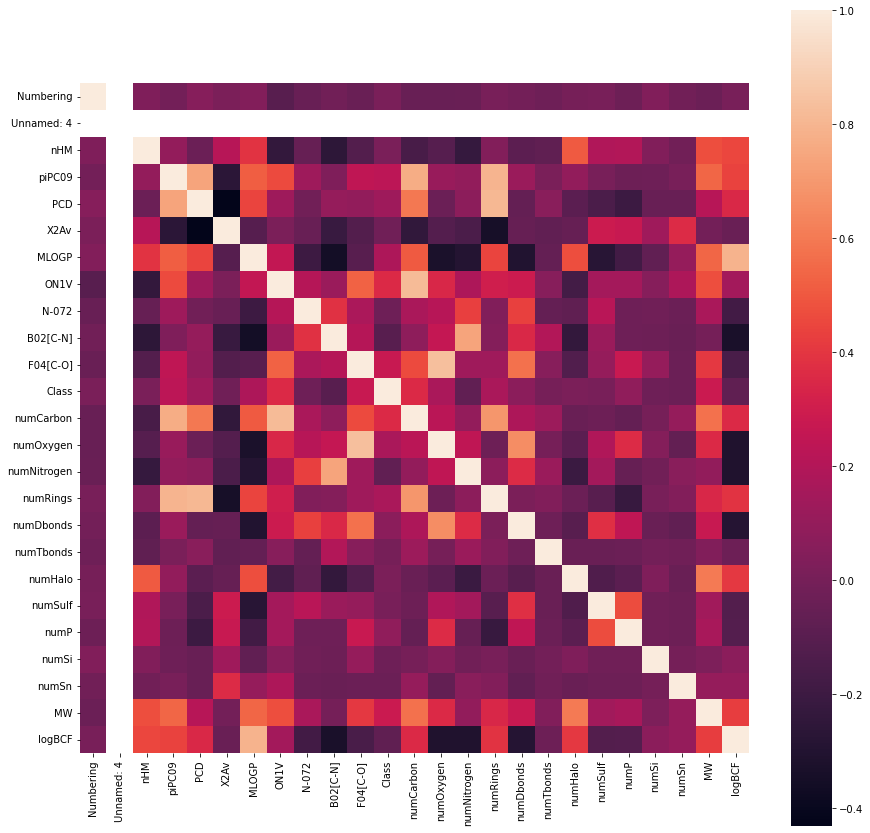

In [1]:
#Importing and Partitioning the Data
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

data = pd.read_csv('QSARData.csv')
train = data[data['Set']== 'Train']
test = data[data['Set']== 'Test']

x_test= test[test.columns[5:27]]
y_test = test.loc[:,'logBCF']

x_train= train[train.columns[5:27]]
y_train= train.loc[:,'logBCF']

#Brief Exploration of Data 
import seaborn as sb
import matplotlib.pyplot as plt
C_mat = train.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = 1, square = True)
plt.show()

In [2]:
#CART Model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)  

cross_val_score(regressor, x_train, y_train, cv=10) #Return the coefficient of determination of the prediction.
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test) #Return the coefficient of determination of the prediction.

0.750257930518768

In [3]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
regressorR = RandomForestRegressor( n_estimators = 500, max_depth=30, random_state=0)  

cross_val_score(regressorR, x_train, y_train, cv=10) #Return the coefficient of determination of the prediction.
regressorR.fit(x_train, y_train)
regressorR.score(x_test, y_test) #Return the coefficient of determination of the prediction.

0.8408088274932373

In [4]:
#Neural Network Model
#Experimenting with Normalized Inputs
mean = x_train.mean()
std = x_train.std()
x_Ntest=(x_test-mean)/std
x_Ntrain=(x_train-mean)/std


In [18]:
import tensorflow as tf
from keras.layers import Activation, Dense
from keras.models import Sequential 
from keras import optimizers
from keras import backend as K

#Creating Coefficient of Determination Evaluation Metric
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#Building the Model
model1 = Sequential()
model1.add(Dense(60, input_dim=22))
model1.add(Activation('relu'))
model1.add(Dense(30))
model1.add(Activation('relu'))
model1.add(Dense(1))
model1.add(Activation('relu'))

model1.compile(optimizer= 'adam', loss= 'mean_absolute_error',metrics=[coeff_determination]) #Building the Model

training = model1.fit(x_Ntrain, y_train, batch_size=100, epochs=120, verbose=1, validation_data=(x_Ntest,y_test))

model1.evaluate(x_Ntest, y_test)

Epoch 1/120
6/6 [==============================] - 1s 53ms/step - loss: 2.0382 - coeff_determination: -2.3482 - val_loss: 2.0912 - val_coeff_determination: -2.2723
Epoch 2/120
6/6 [==============================] - 0s 9ms/step - loss: 1.9596 - coeff_determination: -2.1912 - val_loss: 1.9535 - val_coeff_determination: -1.9816
Epoch 3/120
6/6 [==============================] - 0s 9ms/step - loss: 1.8053 - coeff_determination: -1.7264 - val_loss: 1.7236 - val_coeff_determination: -1.4208
Epoch 4/120
6/6 [==============================] - 0s 9ms/step - loss: 1.5767 - coeff_determination: -1.1532 - val_loss: 1.4650 - val_coeff_determination: -0.8821
Epoch 5/120
6/6 [==============================] - 0s 9ms/step - loss: 1.3579 - coeff_determination: -0.6007 - val_loss: 1.2388 - val_coeff_determination: -0.4369
Epoch 6/120
6/6 [==============================] - 0s 9ms/step - loss: 1.1534 - coeff_determination: -0.1733 - val_loss: 1.0663 - val_coeff_determination: -0.1283
Epoch 7/120
6/6 [====

6/6 [==============================] - 0s 9ms/step - loss: 0.3440 - coeff_determination: 0.8314 - val_loss: 0.4919 - val_coeff_determination: 0.7704
Epoch 52/120
6/6 [==============================] - 0s 9ms/step - loss: 0.3417 - coeff_determination: 0.8386 - val_loss: 0.4943 - val_coeff_determination: 0.7690
Epoch 53/120
6/6 [==============================] - 0s 10ms/step - loss: 0.3381 - coeff_determination: 0.8382 - val_loss: 0.4900 - val_coeff_determination: 0.7727
Epoch 54/120
6/6 [==============================] - 0s 10ms/step - loss: 0.3337 - coeff_determination: 0.8403 - val_loss: 0.4913 - val_coeff_determination: 0.7720
Epoch 55/120
6/6 [==============================] - 0s 9ms/step - loss: 0.3304 - coeff_determination: 0.8390 - val_loss: 0.4900 - val_coeff_determination: 0.7708
Epoch 56/120
6/6 [==============================] - 0s 8ms/step - loss: 0.3285 - coeff_determination: 0.8485 - val_loss: 0.4904 - val_coeff_determination: 0.7746
Epoch 57/120
6/6 [=====================

6/6 [==============================] - 0s 9ms/step - loss: 0.2564 - coeff_determination: 0.8906 - val_loss: 0.4616 - val_coeff_determination: 0.7975
Epoch 102/120
6/6 [==============================] - 0s 9ms/step - loss: 0.2565 - coeff_determination: 0.8964 - val_loss: 0.4554 - val_coeff_determination: 0.7965
Epoch 103/120
6/6 [==============================] - 0s 9ms/step - loss: 0.2570 - coeff_determination: 0.8973 - val_loss: 0.4580 - val_coeff_determination: 0.8008
Epoch 104/120
6/6 [==============================] - 0s 10ms/step - loss: 0.2530 - coeff_determination: 0.8981 - val_loss: 0.4507 - val_coeff_determination: 0.8023
Epoch 105/120
6/6 [==============================] - 0s 9ms/step - loss: 0.2508 - coeff_determination: 0.8977 - val_loss: 0.4526 - val_coeff_determination: 0.8039
Epoch 106/120
6/6 [==============================] - 0s 10ms/step - loss: 0.2463 - coeff_determination: 0.9008 - val_loss: 0.4591 - val_coeff_determination: 0.7992
Epoch 107/120
6/6 [===============

[0.44696229696273804, 0.7744109034538269]

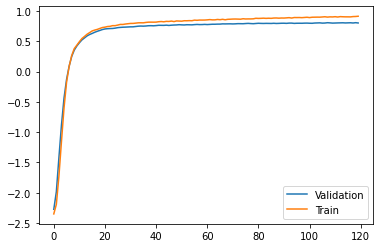

In [19]:
xl = list(range(120))
vy = training.history['val_coeff_determination']
ty = training.history['coeff_determination']

plt.plot( xl, vy,  label='Validation' )
plt.plot( xl, ty, label='Train' )
plt.legend()
plt.show()

In [ ]:
#Testing with Sklearn
from sklearn.neural_network import MLPRegressor
regressorNN = MLPRegressor(solver='adam', alpha=1e-4,hidden_layer_sizes=(65,30), random_state=1, verbose=False, max_iter=800)
regressorNN.fit(x_train,y_train)
regressorNN.score(x_test,y_test) #Outputs r^2
